In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_m12_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        41.6839 (35.7574, 48.1646) (35.5634, 47.9326) 12.3692 (Jnode 202)\n',
 't_n104        23.6552 (17.8090, 36.2217) (16.7289, 34.1897) 17.4608 (Jnode 201)\n',
 't_n105        22.8250 (17.2140, 34.9916) (16.2407, 33.0839) 16.8432 (Jnode 200)\n',
 't_n106        20.2503 (15.3682, 30.9806) (14.5142, 29.2213) 14.7071 (Jnode 199)\n',
 't_n107        19.6566 (14.9475, 30.0165) (14.0915, 28.2952) 14.2037 (Jnode 198)\n',
 't_n108        18.5734 (14.2098, 28.1167) (13.3656, 26.4966) 13.1310 (Jnode 197)\n',
 't_n109         8.2777 ( 6.0883, 11.8724) ( 5.7978, 11.3900)  5.5923 (Jnode 196)\n',
 't_n110         8.2115 ( 6.0404, 11.7762) ( 5.7833, 11.3291)  5.5458 (Jnode 195)\n',
 't_n111         7.9883 ( 5.8738, 11.4575) ( 5.6035, 11.0034)  5.3999 (Jnode 194)\n',
 't_n112         7.7208 ( 5.6725, 11.0759) ( 5.4343, 10.6534)  5.2191 (Jnode 193)\n',
 't_n113         7.3764 ( 5.4179, 10.5890) ( 5.1422, 10.1291)  4.9869 (Jnode 192)\n',
 't_n114         5.4023 ( 3.9146,  7.7953) ( 3.7068,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[41.6839,
 23.6552,
 22.825,
 20.2503,
 19.6566,
 18.5734,
 8.2777,
 8.2115,
 7.9883,
 7.7208,
 7.3764,
 5.4023,
 3.824,
 2.915,
 1.4822,
 5.6362,
 4.8464,
 7.654,
 5.0276,
 7.3421,
 5.863,
 4.7567,
 3.8784,
 7.1064,
 6.7026,
 1.7254,
 7.8694,
 7.1006,
 5.4294,
 4.3165,
 4.893,
 4.4485,
 3.7208,
 3.4434,
 17.282,
 13.6402,
 18.6791,
 16.9987,
 15.7801,
 12.9098,
 6.6927,
 12.4272,
 10.8912,
 9.6842,
 8.2671,
 15.3183,
 14.0439,
 2.9452,
 1.2775,
 21.2872,
 19.9364,
 17.9001,
 17.2686,
 18.5965,
 12.1288,
 15.134,
 11.9102,
 22.7854,
 21.1416,
 18.9589,
 17.8475,
 15.0237,
 9.9191,
 13.2721,
 18.6265,
 5.4351,
 18.7743,
 12.3614,
 11.9366,
 11.6252,
 10.932,
 9.985,
 9.507,
 9.1533,
 8.7381,
 7.7599,
 6.7084,
 5.5832,
 7.8925,
 7.4341,
 5.8969,
 6.7037,
 8.5757,
 7.905,
 7.3064,
 6.2447,
 4.3106,
 8.0878,
 7.2589,
 6.4164,
 9.485,
 8.999,
 8.5309,
 7.5462,
 5.5242,
 8.4629,
 4.6304,
 3.7036,
 1.3723,
 11.9156,
 10.0682]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_m12_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[40.5541,
 27.1302,
 25.4394,
 22.4038,
 21.4218,
 19.3486,
 9.3309,
 9.2005,
 8.7221,
 8.2443,
 7.7702,
 5.6424,
 3.9995,
 2.927,
 1.704,
 5.9858,
 4.9174,
 8.2228,
 5.3228,
 7.768,
 6.1062,
 4.8463,
 4.3983,
 7.6187,
 7.0219,
 2.2338,
 8.6188,
 7.5746,
 5.7833,
 4.5488,
 5.2749,
 4.6326,
 3.7438,
 4.1251,
 17.7112,
 14.3671,
 19.9613,
 17.7966,
 16.0004,
 12.9465,
 7.1512,
 12.7683,
 10.7574,
 9.2439,
 7.5905,
 15.93,
 14.2666,
 3.9129,
 1.7832,
 22.6133,
 20.4387,
 17.6032,
 17.2479,
 19.2896,
 12.7667,
 15.6947,
 11.8718,
 25.9687,
 23.8314,
 20.995,
 19.1847,
 16.1925,
 11.4015,
 13.8763,
 20.4699,
 7.6433,
 20.7772,
 15.6438,
 14.5822,
 13.6907,
 12.6391,
 11.3094,
 10.5797,
 9.9481,
 9.1791,
 7.9114,
 6.6519,
 5.4849,
 8.1074,
 7.4794,
 5.8561,
 6.3869,
 9.1389,
 8.1723,
 7.2696,
 6.0947,
 4.2052,
 8.284,
 7.3112,
 6.2523,
 10.3697,
 9.5107,
 8.6326,
 7.3716,
 5.145,
 8.9236,
 6.057,
 4.6422,
 1.8464,
 14.9115,
 12.4401]

In [12]:
posterior_mean_iqtree

[41.6839,
 23.6552,
 22.825,
 20.2503,
 19.6566,
 18.5734,
 8.2777,
 8.2115,
 7.9883,
 7.7208,
 7.3764,
 5.4023,
 3.824,
 2.915,
 1.4822,
 5.6362,
 4.8464,
 7.654,
 5.0276,
 7.3421,
 5.863,
 4.7567,
 3.8784,
 7.1064,
 6.7026,
 1.7254,
 7.8694,
 7.1006,
 5.4294,
 4.3165,
 4.893,
 4.4485,
 3.7208,
 3.4434,
 17.282,
 13.6402,
 18.6791,
 16.9987,
 15.7801,
 12.9098,
 6.6927,
 12.4272,
 10.8912,
 9.6842,
 8.2671,
 15.3183,
 14.0439,
 2.9452,
 1.2775,
 21.2872,
 19.9364,
 17.9001,
 17.2686,
 18.5965,
 12.1288,
 15.134,
 11.9102,
 22.7854,
 21.1416,
 18.9589,
 17.8475,
 15.0237,
 9.9191,
 13.2721,
 18.6265,
 5.4351,
 18.7743,
 12.3614,
 11.9366,
 11.6252,
 10.932,
 9.985,
 9.507,
 9.1533,
 8.7381,
 7.7599,
 6.7084,
 5.5832,
 7.8925,
 7.4341,
 5.8969,
 6.7037,
 8.5757,
 7.905,
 7.3064,
 6.2447,
 4.3106,
 8.0878,
 7.2589,
 6.4164,
 9.485,
 8.999,
 8.5309,
 7.5462,
 5.5242,
 8.4629,
 4.6304,
 3.7036,
 1.3723,
 11.9156,
 10.0682]

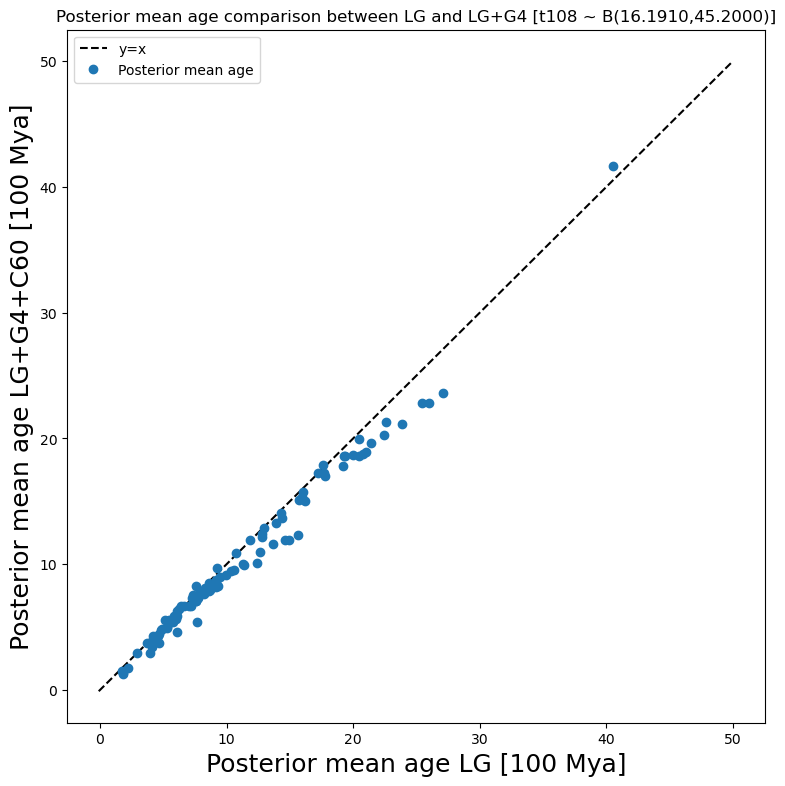

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t108 ~ B(16.1910,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_m12_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')